# 微分・積分の応用

特に距離、速度、加速度のように1階微分と２階微分で関連が表せるもの。

WORK IN PROGRESS

### 経済学における総費用、限界費用、費用の加速度のグラフ


- 総費用 (Total Cost, TC): ある製品を生産するための総合的な費用。生産量 $q$ に応じて変化します。
- 限界費用 (Marginal Cost, MC): 生産量を1単位増やしたときに増加する費用。総費用の生産量$q$に関する微分で表されます。
- 費用の加速度 (Cost Acceleration): 限界費用が生産量に応じてどのように変化するかを示す。限界費用の生産量に関する微分、つまり総費用の2階微分で表されます。

以下はsympy を使ってシンボリックに```diff```関数を呼び出して微分の式を定義し、それを```lambdify```関数で数値計算用の関数に変換し、データを計算してグラフにしています。

Total Cost (TC):



Marginal Cost (MC):



Cost Acceleration:


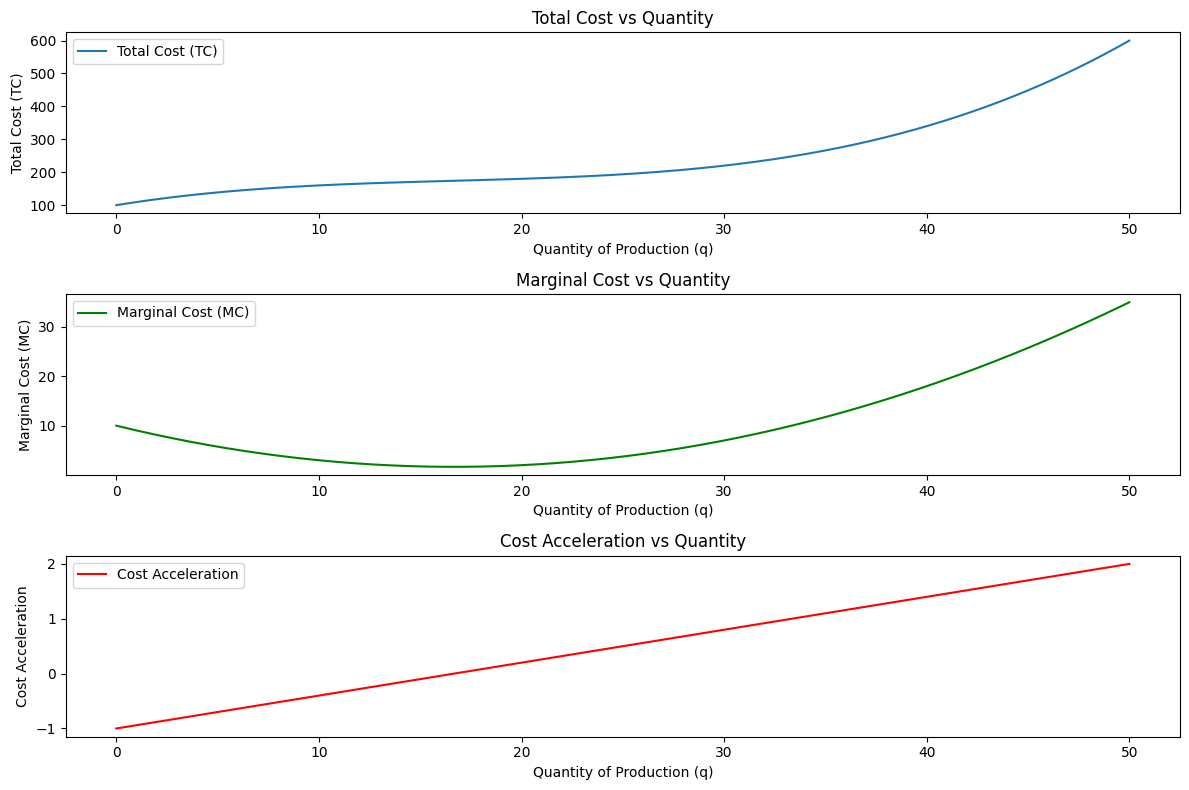

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# SymPyの出力をLaTeX形式で表示する設定
sp.init_printing()

# 数式の表示
from IPython.display import display

# SymPyの設定
q = sp.symbols('q')
a = sp.symbols('a')
b = sp.symbols('b')
c = sp.symbols('c')
d = sp.symbols('d')

# 総費用のパラメータ
a = 0.01
b = -0.5
c = 10
d = 100

# 総費用のシンボリックな関数
TC_expr = a * q**3 + b * q**2 + c * q + d

# 限界費用のシンボリックな微分
MC_expr = sp.diff(TC_expr, q)

# 費用の加速度のシンボリックな微分
CA_expr = sp.diff(MC_expr, q)

# シンボリックな結果の表示
print("Total Cost (TC):")
display(TC_expr)
print("\nMarginal Cost (MC):")
display(MC_expr)
print("\nCost Acceleration:")
display(CA_expr)

# 数値計算のために、シンボリックな関数を数値関数に変換
TC_func = sp.lambdify(q, TC_expr, 'numpy')
MC_func = sp.lambdify(q, MC_expr, 'numpy')
CA_func = sp.lambdify(q, CA_expr, 'numpy')

# 生産量の範囲を設定
q_values = np.linspace(0, 50, 500)

# 各費用の計算
TC_values = TC_func(q_values)
MC_values = MC_func(q_values)
CA_values = CA_func(q_values)

# グラフの描画
plt.figure(figsize=(12, 8))

# 総費用のグラフ
plt.subplot(3, 1, 1)
plt.plot(q_values, TC_values, label='Total Cost (TC)')
plt.title('Total Cost vs Quantity')
plt.xlabel('Quantity of Production (q)')
plt.ylabel('Total Cost (TC)')
plt.legend()

# 限界費用のグラフ
plt.subplot(3, 1, 2)
plt.plot(q_values, MC_values, color='green', label='Marginal Cost (MC)')
plt.title('Marginal Cost vs Quantity')
plt.xlabel('Quantity of Production (q)')
plt.ylabel('Marginal Cost (MC)')
plt.legend()

# 費用の加速度のグラフ
plt.subplot(3, 1, 3)
plt.plot(q_values, CA_values, color='red', label='Cost Acceleration')
plt.title('Cost Acceleration vs Quantity')
plt.xlabel('Quantity of Production (q)')
plt.ylabel('Cost Acceleration')
plt.legend()

plt.tight_layout()
plt.show()


#### 微分の役割

- **一次微分**（総費用を微分して限界費用）は、総費用曲線の接線の傾きを表します。これは、生産量を少し増やしたときに総費用がどれだけ増えるかを示します。

- **二次微分**: 二次微分（限界費用を微分して費用の加速度）は、限界費用曲線の傾きの変化を表します。これは、限界費用が生産量に応じてどのように変化するかを示します。

#### 解釈
**総費用のグラフ**:

- 生産量が増えると総費用は増加します。
- 最初はゆるやかに増加しますが、生産量が多くなると増加の度合いが大きくなります（曲線が上に反る）。
- 三次関数グラフの特徴であるS字曲線になっている。

**限界費用のグラフ**:

- 生産量が増えると限界費用は変化します。
- 最初は減少し、その後増加に転じます。これは生産の初期段階では効率が良く、追加の生産にかかる費用が減るが、一定の生産量を超えると効率が悪化し、追加の費用が増えることを示しています。
- 二次関数グラフの特徴である放物線になっている。

**費用の加速度のグラフ**:

- 費用の加速度は、生産量に応じて直線的に増加します。
- 負の値から始まり、ある点でゼロになり、その後正の値になります。これは限界費用の変化率が生産量に応じて増加していることを示しています。


### 積分による関係：

1. **総費用は限界費用の積分：**

これは「あとどのぐらい生産量を増やしたら、総費用も増えるか」を知るのに便利です。

   $$
   C(q) = \int MC(q) \, dq + C_0
   $$

   （\(C_0\) は固定費用などの初期費用）

2. **限界費用は費用の加速度の積分：**

「費用の加速度」が分かっている時、生産量につきどのぐらい１単位あたりの費用の増加が見込まれるか」が分かる

   $$
   MC(q) = \int AC(q) \, dq + MC_0
   $$

   （\(MC_0\) は初期の限界費用）
